# G12 covariance matrix
Main Reference:

* <a href=https://ftp.cs.ucla.edu/pub/stat_ser/r493.pdf>A Crash Course in Good and Bad Controls</a>,
by Carlos Cinelli, Andrew Forney and Judea Pearl

In this notebook, we derive, using a symbolic manipulator (SymPy), the covariance matrix and jacobian as a function of the gains, for 

## G12 

This covariance matrix appears at the end of that paper.

## Conditioning on $\underline{Z}$

When $\underline{Z}$ is held fixed to a constant
value $z$, we must set
1. $\langle \underline{Z},\underline{a}\rangle=0$ 
for any node $\underline{a}$. That's because if one of the two arguments 
of a covariance is a constant, the covariance is zero. Hence, 
for arbitrary nodes $\underline{a}$
and $\underline{b}$,
ratios such as 
$\langle \underline{Z},
\underline{a}\rangle/\langle \underline{Z},
\underline{b}\rangle$,
are indefinite,
and can take on any value.

2. $\langle\underline{\epsilon}_\underline{Z},\underline{\epsilon}_\underline{a}\rangle=0$ 
for any node $\underline{a}$.
That's because when $\underline{Z}$ is held fixed,
$\underline{\epsilon}_\underline{Z}$ no longer serves any 
purpose and becomes arbitrary.

3. $\langle\underline{\epsilon}_\underline{a},\underline{\epsilon}_\underline{b}\rangle=0$ 
for any two distinct nodes $\underline{a}, \underline{b}$.
This is the standard SCM assumption that 
$\langle \underline{\epsilon}_i, \underline{\epsilon}_j\rangle=0$
if $i\neq j$.

When $\underline{Z}$ is a "good" control (see, for example, 
the notebooks for graph G1),
(1), (2) and (3) can all be satisfied without contradiction. 

When $\underline{Z}$ is a "bad" control (see, for example, 
the notebooks for graph G7),
(1), (2) and (3) cannot all be satisfied without contradiction. It  is possible,
however, to satisfy constraints (1) and (2), but
discard (3). The SCuMpy function 'CovMatCalculator()'
has a parameter 'conditioned_nds' which is
normally set to None, but which when set to a list of nodes as in
'conditioned_nds=["Z"]', includes all covariances
$\langle \underline{\epsilon}_i, \underline{\epsilon}_j\rangle\neq 0$,
as long neither $i$ nor $j$ is in the conditioned nodes list.

The reason that discarding constraint (3) when we condition
on some nodes makes sense is as follows. If one of the 
nodes you are conditioning on is a collider, you might
open an unblocked path between two of the $\underline{\epsilon}_j$
nodes. This is exactly what happens when you condition
graph G7 on node $\underline{Z}$.

In [1]:
# this makes sure it starts looking for things from the scumpy folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

C:\Users\rrtuc\Desktop\backed-up\python-projects\scumpy


In [2]:
from Graph import *
from CovMatCalculator import *

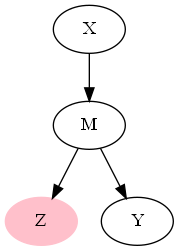

In [3]:
path = 'dot_atlas/good_bad_trols_G12.dot'
graph = Graph(path)
graph.draw(jupyter=True)

In [4]:
cal = CovMatCalculator(graph)
cal.calculate_cov_mat_sb()
cal.print_cov_mat_entries()

\begin{array}{l}
\left\langle\underline{X}, \underline{X}\right\rangle=\sigma^2_{\underline{\epsilon}_{\underline{X}}}
\\
\left\langle\underline{X}, \underline{M}\right\rangle=\alpha_{\underline{M}|\underline{X}} \sigma^2_{\underline{\epsilon}_{\underline{X}}}
\\
\left\langle\underline{X}, \underline{Z}\right\rangle=\alpha_{\underline{M}|\underline{X}} \alpha_{\underline{Z}|\underline{M}} \sigma^2_{\underline{\epsilon}_{\underline{X}}}
\\
\left\langle\underline{X}, \underline{Y}\right\rangle=\alpha_{\underline{M}|\underline{X}} \alpha_{\underline{Y}|\underline{M}} \sigma^2_{\underline{\epsilon}_{\underline{X}}}
\\
\left\langle\underline{M}, \underline{X}\right\rangle=\alpha_{\underline{M}|\underline{X}} \sigma^2_{\underline{\epsilon}_{\underline{X}}}
\\
\left\langle\underline{M}, \underline{M}\right\rangle=\alpha_{\underline{M}|\underline{X}}^{2} \sigma^2_{\underline{\epsilon}_{\underline{X}}} + \sigma^2_{\underline{\epsilon}_{\underline{M}}}
\\
\left\langle\underline{M}, \underline{Z}

In [5]:
cal.print_jacobian_entries()

\begin{array}{l}
\frac{\partial\underline{X}}{\partial\underline{X}}=1
\\
\frac{\partial\underline{X}}{\partial\underline{M}}=\frac{\alpha_{\underline{M}|\underline{X}} \sigma^2_{\underline{\epsilon}_{\underline{X}}}}{\alpha_{\underline{M}|\underline{X}}^{2} \sigma^2_{\underline{\epsilon}_{\underline{X}}} + \sigma^2_{\underline{\epsilon}_{\underline{M}}}}
\\
\frac{\partial\underline{X}}{\partial\underline{Z}}=\frac{\alpha_{\underline{M}|\underline{X}} \alpha_{\underline{Z}|\underline{M}} \sigma^2_{\underline{\epsilon}_{\underline{X}}}}{\alpha_{\underline{M}|\underline{X}}^{2} \alpha_{\underline{Z}|\underline{M}}^{2} \sigma^2_{\underline{\epsilon}_{\underline{X}}} + \alpha_{\underline{Z}|\underline{M}}^{2} \sigma^2_{\underline{\epsilon}_{\underline{M}}} + \sigma^2_{\underline{\epsilon}_{\underline{Z}}}}
\\
\frac{\partial\underline{X}}{\partial\underline{Y}}=\frac{\alpha_{\underline{M}|\underline{X}} \alpha_{\underline{Y}|\underline{M}} \sigma^2_{\underline{\epsilon}_{\underline{X}}}}{\a